In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [80]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MEDV']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [81]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [82]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [83]:
X=df.drop(columns=['MEDV'],axis=1)
y=df[['MEDV']]

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)


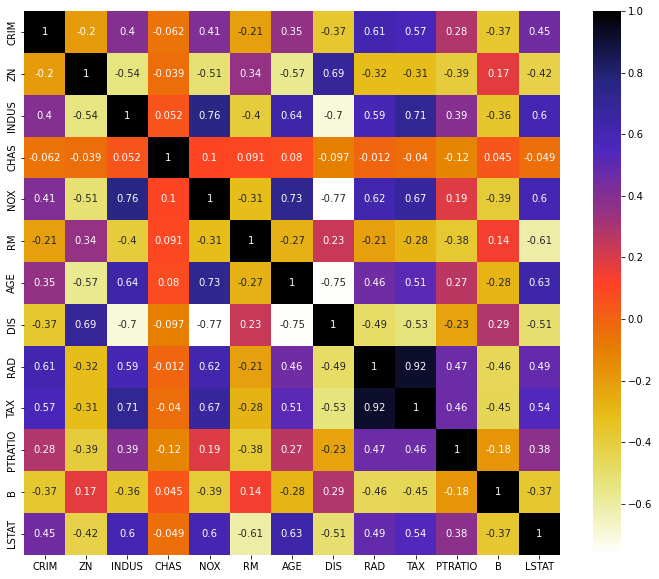

In [85]:
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [112]:

# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other 
# features

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            #print(i,j)
            if abs(corr_matrix.iloc[i,j])> threshold :
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
            
    return col_corr
        

In [113]:
corr_features= correlation(X_train,0.7)
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [114]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.0,6.849,7.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0.0,6.696,5.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0.0,6.030,3.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0.0,5.878,4.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0.0,5.362,24.0,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0.0,6.442,4.0,18.2,395.01,8.16
224,0.31533,0.0,6.20,0.0,8.266,8.0,17.4,385.05,4.14
110,0.10793,0.0,8.56,0.0,6.195,5.0,20.9,393.49,13.00
426,12.24720,0.0,18.10,0.0,5.837,24.0,20.2,24.65,15.69
